<a href="https://colab.research.google.com/github/valterlucena/facial-expression-detector/blob/master/facial_expressions_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title Dependências

import numpy as np  # manipular dados

import tensorflow as tf  # tensorflow
import tensorflow.keras as keras  
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os, cv2
from sklearn.model_selection import train_test_split as tts
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
width = int(945/10)
heigth = int(1181/10)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path = '/content/gdrive/My Drive/PercepcaoComputacional/faces/'
imgfiles = [ifile for ifile in os.listdir(path) if ifile.endswith('.jpg')]
images = []
labels = [label[-7][0] for label in imgfiles]
for imgfile in imgfiles:
    img = cv2.imread(path + imgfile)
    images.append(cv2.resize(img,(width, heigth), interpolation = cv2.INTER_AREA))

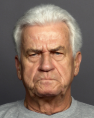

In [7]:
cv2_imshow(images[0])

In [0]:
unique_labels = list(set(labels))
wi = {v: i for i, v in enumerate(unique_labels)}
rwi = {i: v for i, v in enumerate(unique_labels)}
num_labels = [wi[l] for l in labels]

In [0]:
imagesnp = np.array(images)
imagesnp = imagesnp.reshape(-1, heigth, width,3)

In [10]:
model = keras.Sequential([
    keras.applications.vgg16.VGG16(input_shape=images[0].shape,
                                   include_top=False),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(len(unique_labels), activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 6150      
Total params: 16,295,750
Trainable params: 16,295,750
Non-trainable params: 0
_________________________________________________________________


In [0]:
cat_labels = keras.utils.to_categorical(num_labels)
x, y = shuffle(imagesnp, cat_labels, random_state=42)
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3)

In [0]:
EPOCHS = 100
validation_data = (x_test, y_test)

In [0]:
model.fit(x_train, y_train, validation_data=validation_data, epochs=EPOCHS)

Train on 50 samples, validate on 22 samples
Epoch 1/100
50/50 [==============================] - 26s 518ms/sample - loss: 10.7047 - acc: 0.1000 - val_loss: 8.2712 - val_acc: 0.0455
Epoch 2/100
50/50 [==============================] - 26s 519ms/sample - loss: 7.6680 - acc: 0.2200 - val_loss: 1.7985 - val_acc: 0.0909
Epoch 3/100
50/50 [==============================] - 26s 513ms/sample - loss: 1.8049 - acc: 0.2000 - val_loss: 1.7958 - val_acc: 0.1818
Epoch 4/100
50/50 [==============================] - 26s 513ms/sample - loss: 1.9878 - acc: 0.1600 - val_loss: 1.7992 - val_acc: 0.0455
Epoch 5/100
50/50 [==============================] - 26s 511ms/sample - loss: 1.7889 - acc: 0.2200 - val_loss: 1.8039 - val_acc: 0.0455
Epoch 6/100
50/50 [==============================] - 26s 514ms/sample - loss: 5.8100 - acc: 0.2200 - val_loss: 1.8079 - val_acc: 0.0455
Epoch 7/100
50/50 [==============================] - 26s 515ms/sample - loss: 1.7851 - acc: 0.2200 - val_loss: 1.8114 - val_acc: 0.0455
Epo